# Part I: Sorting
In `def sort(values)`, a quicksort for numpy array is implemented, with $O(Nlog(N))$ time complexity in general, and $O(N^2)$ in worst cases.

#### Algorithm
This version of quicksort (abbraviated as qsort in following passage) chose the first element as the `pivot`. In each turn, if the incoming array has length greater than one, then qsort do the following:
1. __select__ elements smaller than the `pivot` as `left`, select elements greater than the `pivot` as `right`
2. __rearange__ the array to the form of `left` + `pivot` + `right`
3. do __qsort__ on `left` and `right`

#### Complexity
First we analyse one trun:
1. select part: selecting `left` and `right` compares the whole array with `pivot` one time each, therefore time complexity is $O(2length) = O(length)$
2. rearange part: we simply copy `left`, `pivot` and `right` to the original array, with time complexity $O(length)$

In general, if the incoming array is almost random, we will approximately have half `left` and half `right` on each side of the pivot. Thus $T(n) = 2T(n/2)+cn$ and therefore by master theroem $T(N) = O(Nlog(N))$.

However, in worst cases, one side of each turn has $(length-1)$ elements while the other side has no elements. Hence we have $T(n) = T(n-1)+cn$ and therefore by master theroem $T(N) = O(N^2)$.

## Code (20 points)

In [1]:
# the function
def sort(values):
    if len(values) > 1:
        #1. select pivot, then left and right
        pivot = values[0]
        left = [x for x in values[1:] if x < pivot]
        right = [x for x in values[1:] if x >= pivot]
        
        #2. rearange the array to [left+pivot+right]
        values[len(left)] = pivot
        for i in range(0, len(left)):
            values[i] = left[i]
        for i in range(0, len(right)):
            values[i+1+len(left)] = right[i]
        
        #3. qsort left and right
        sort(values[0:len(left)])
        sort(values[len(left)+1:])
    return values

In [2]:
# main
import numpy as np

# different random seed
np.random.seed()

# generate numbers
N = 10
# the TA will vary the input array size and content during testing
values = np.random.random([N])

sort(values)

correct = True
for index in range(1, len(values)):
    if(values[index-1] > values[index]):
        correct = False
        
print('Correct? ' + str(correct))

Correct? True


# Part II: Line fitting

The loss function is $L\left(\mathbf{X}, \mathbf{T}, \mathbf{Y}\right) = \sum_i \left( T^{(i)} - Y^{(i)}\right)^2 = \sum_i \left( T^{(i)} - w_1 X^{(i)} - w_0 \right)^2$.

## Math (30 points)

Write down explicit formulas for $w_0$ and $w_1$ in terms of $\mathbf{X}$ and $\mathbf{T}$.

### Vectored Version (The Formal Solution)
We let $\mathbf{H} = [\mathbf{1} | \mathbf{X}]$, therefore $\mathbf{H} \Theta =  \mathbf{Y}$.
Set $\nabla_\Theta L(\Theta) = 0 $ we get 

$$
\begin{align}
\nabla_\Theta L(\Theta) & = \nabla_\Theta \frac{1}{2} (\mathbf{H} \Theta - \mathbf{T})^T (\mathbf{H} \Theta - \mathbf{T}) \\
0 & = \frac{1}{2} \nabla_\Theta({\Theta}^T {\mathbf{H}}^T \mathbf{H} \Theta - {\Theta}^T {\mathbf{H}}^T \mathbf{T} - \mathbf{T}^T \mathbf{H} \Theta + \mathbf{T}^T \mathbf{T}) \\
0 & = \frac{1}{2} ({\mathbf{H}}^T \mathbf{H} \Theta + {\mathbf{H}}^T \mathbf{H} \Theta - {\mathbf{H}}^T \mathbf{T} - {\mathbf{H}}^T \mathbf{T}) \\
0 & = {\mathbf{H}}^T \mathbf{H} \Theta - {\mathbf{H}}^T \mathbf{T} \\
{\mathbf{H}}^T \mathbf{H} \Theta & = {\mathbf{H}}^T \mathbf{T} \\
\Theta & = ({\mathbf{H}}^T \mathbf{\mathbf{H}})^{-1} {\mathbf{\mathbf{H}}}^T {\mathbf{T}}
\end{align}
$$

Hence $\Theta = \{w_0, w_1 \}^T = ({\mathbf{H}}^T \mathbf{\mathbf{H}})^{-1} {\mathbf{\mathbf{H}}}^T {\mathbf{T}}$ with $\mathbf{H} = [\mathbf{1} | \mathbf{X}]$.

### Unvectored Version (The Solution only for Reference)
As the loss is convex, we can simply apply first-order necessary condition

$$
\begin{equation}
\frac{\partial L}{\partial w_0} = - 2\sum_i \left( T^{(i)} - w_1 X^{(i)} - w_0 \right) = 0 \\
\frac{\partial L}{\partial w_1} = - 2\sum_i \left(X^{(i)}( T^{(i)} - w_1 X^{(i)} - w_0) \right) = 0
\end{equation}
$$

We extract $w_0$ from the first equation, to substitute $w_0$ in the second equation

$$
\begin{equation}
w_0 = \frac{\sum_i \left( T^{(i)} - w_1 X^{(i)}\right)}{n} \\
\sum_i \left(X^{(i)}( T^{(i)} - w_1 X^{(i)} - \frac{\sum_j \left( T^{(j)} - w_1 X^{(j)}\right)}{n}) \right) = 0
\end{equation}
$$

Now that the second equation is only composed of $w_1, \mathbf{X}$ and $\mathbf{T}$, we can solve out $w_1$

$$
\begin{equation}
\sum_i \left(X^{(i)}T^{(i)} - w_1 X^{(i)}X^{(i)} - X^{(i)}\frac{\sum_j T^{(j)}}{n} + w_1 X^{(i)}\frac{\sum_j X^{(j)}}{n} \right) = 0 \\
\sum_i X^{(i)} T^{(i)} - \frac{\sum_i X^{(i)} \sum_j T^{(j)}}{n} = w_1(\sum_i X^{(i)} X^{(i)} - \frac{\sum_i X^{(i)} \sum_j X^{(j)}}{n})\\\
w_1 =  \frac{n \sum_i X^{(i)} T^{(i)} - \sum_i X^{(i)} \sum_j T^{(j)}}{n \sum_i X^{(i)} X^{(i)} - \sum_i X^{(i)} \sum_j X^{(j)}} = \frac{n \sum_i X^{(i)} T^{(i)} - \sum_i X^{(i)} \sum_j T^{(j)}}{n \sum_i (X^{(i)})^2 - (\sum_i X^{(i)})^2}
\end{equation}
$$

Now simply substitute $w_1$ in the expression of $w_0$

$$
\begin{equation}
w_0 = \frac{\sum_i \left( T^{(i)} - w_1 X^{(i)}\right)}{n} = \frac{\sum_i X^{(i)} X^{(i)} \sum_j T^{(j)} - \sum_i X^{(i)} T^{(i)} \sum_j X^{(j)}}{n \sum_i (X^{(i)})^2 - (\sum_i X^{(i)})^2}
\end{equation}
$$

To conclude
$$ \left\{
\begin{aligned}
w_1 & = \frac{n \sum_i X^{(i)} T^{(i)} - \sum_i X^{(i)} \sum_j T^{(j)}}{n \sum_i (X^{(i)})^2 - (\sum_i X^{(i)})^2}\\
w_0 & = \frac{\sum_i X^{(i)} X^{(i)} \sum_j T^{(j)} - \sum_i X^{(i)} T^{(i)} \sum_j X^{(j)}}{n \sum_i (X^{(i)})^2 - (\sum_i X^{(i)})^2} \\
\end{aligned}
\right.
$$

## Code (50 points)

In [3]:
# line model
import numpy as np

class Line(object):
    def __init__(self, w0, w1):
        self.w0 = w0
        self.w1 = w1
        
    def predict(self, x, noise=0):
        return (x*self.w1 + self.w0 + noise*np.random.normal())

    # Input: data, a 2D array with each (x, t) pair on a row
    # Return: w0 and w1, the intercept and slope of the fitted line
    def learn(self, data):
        # unvectored version
        # sum_x = sum_t = sum_xx = sum_xt = 0
        # n = data.shape[0]
        # for (x, t) in data:
        #     sum_x += x
        #     sum_t += t
        #     sum_xx += x*x
        #     sum_xt += x*t
        # w0 = (sum_xx*sum_t-sum_xt*sum_x)/(n*sum_xx-sum_x*sum_x)
        # w1 = (n*sum_xt-sum_x*sum_t)/(n*sum_xx-sum_x*sum_x)
        
        # vectored version
        data = data.transpose()
        X = data[0]
        T = data[1]
        H = np.array([np.ones(len(X)), X]).transpose()
        
        Theta = np.linalg.inv((H.transpose()).dot(H)).dot(H.transpose()).dot(T)
        w0 = Theta[0]
        w1 = Theta[1]
        return w0, w1

In [4]:
# test
np.random.seed()

w0 = np.asscalar(np.random.random(1))*2-1
w1 = np.asscalar(np.random.random(1))*2-1

line = Line(w0, w1)

N = 20
noise = 0.05
X = np.random.random([N])
T = []
for x in X:
    T.append(np.sum(line.predict(x, noise)))
T = np.array(T)    

#data = np.vstack((X, T)).transpose()
data = np.array([X, T]).transpose()

w0_fit, w1_fit = line.learn(data)

line_fit = Line(w0_fit, w1_fit)

print('truth:   ' + str(w0) + ' ' + str(w1))
print('predict: ' + str(w0_fit) + ' ' + str(w1_fit))

truth:   0.6273846380904675 -0.5193989006035067
predict: 0.628879281523 -0.502563040791


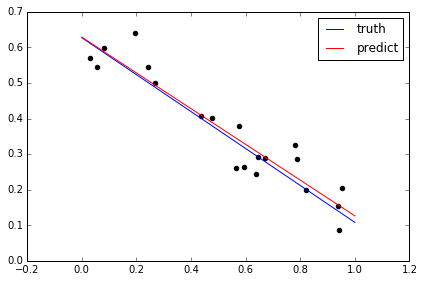

In [5]:
# plot
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1], color='black', marker='o')

X_endpoints = [0, 1]
Y_truth, Y_fit = [], []
for x in X_endpoints:
    Y_truth.append(line.predict(x))
    Y_fit.append(line_fit.predict(x))
    
plt.plot(X_endpoints, Y_truth, color='blue', label='truth')
plt.plot(X_endpoints, Y_fit, color='red', label='predict')

plt.legend(loc='best')
plt.tight_layout()
plt.show()